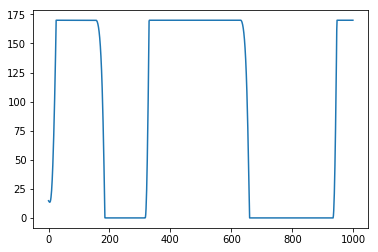

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import math

#
# This simulation is calibrated to respond like the physical
# PID test rig, more or less. The constants kp, ki, kd can be
# be set a the bottom of this cell, and results are plotted
# as the angle of the control arm over time.
#

def test(p,i,d):
    #
    # Initial conditions
    #
    theta = 15.0         # control arm position in degrees (0 = vertical downward; 90 = horizontal)
    dt = 0.10            # seconds per loop
    g = 10.0             # acceleration due to gravity, m/s^2
    max_motor = g * 3.0  # educated guess at max thrust of motor + propeller
    throttle = -1.0      # throttle setting (range is -1.0 to +1.0, to conform to ESC)
    i = 0.0
    angular_velocity = 0.0
    
    target_position = 90.0          # target is to hold control arm in a horizontal position
    e0 = target_position - theta    # initial error allows calculation of de/dt in first pass

    results = []

    #
    # loop for 1000 time steps
    #
    for x in range(0,1000):
        #
        # Simulate the motion of the control arm
        #
        downward_accel = -g * math.sin(theta * 2.0 * math.pi / 360.0)
        upward_accel = ((throttle + 1.0)/2.0) * max_motor
        net_accel = downward_accel + upward_accel
        angular_velocity += net_accel * dt
        theta += angular_velocity
        theta = max(theta, 15.0)
        theta = min(theta, 170.0)
        
        #
        # Measure error, calculate PID, apply result to throttle setting
        #
        e1 = 90.0 - theta
        p = e1
        i = i + (e1 * dt)
        d = (e1 - e0) / dt
        pid = (kp * p) + (ki * i) + (kd * d)
        pid = max(pid, -1.0)
        pid = min(pid,  1.0)
        
        throttle = -1.0 + (pid * 2.0)
        throttle = max(throttle, -1.0)
        throttle = min(throttle,  1.0)
        # print(downward_accel,upward_accel,net_accel,angular_velocity,theta)
        e0 = e1
        results.append(theta)

    plt.plot(results)

    
###################################################
# change the constants, below

kp = 0.000
ki = 0.005
kd = 0.000

test(kp, ki, kd)